In [227]:
import pandas as pd

In [229]:
os.chdir('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2')

In [231]:
ipl_bbb = pd.read_csv('IPL_ball_by_ball_updated till 2024.csv',low_memory=False)

In [232]:
grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()

In [235]:
player_runs = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
player_wickets = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()

## a) NSSO68 Data Multiple Regression

In [238]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set working directory and load the dataset
data = pd.read_csv('NSSO68.csv',low_memory=False)

# Display unique values in 'state_1' column
print(data['state_1'].unique())

# Subset data for state 'KA'
subset_data = data[['foodtotal_q', 'MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education', 'No_of_Meals_per_day']]

# Print subset data
print(subset_data)

# Check for missing values
print(subset_data['MPCE_MRP'].isna().sum())
print(subset_data['MPCE_URP'].isna().sum())
print(subset_data['Age'].isna().sum())
print(subset_data['Possess_ration_card'].isna().sum())
print(data['Education'].isna().sum())

['GUJ' 'ORI' 'CHTSD' 'MP' 'JRKD' 'WB' 'AP' 'MH' 'D&D' 'D&NH' 'MIZ' 'TRPR'
 'MANPR' 'ASSM' 'MEG' 'NAG' 'A&N' 'PNDCRY' 'TN' 'GOA' 'KA' 'KE' 'LKSDP'
 'SKM' 'Bhr' 'UP' 'RJ' 'ARP' 'DL' 'HR' 'Pun' 'HP' 'UT' 'Chandr' 'J$K']
        foodtotal_q  MPCE_MRP  MPCE_URP  Age  Meals_At_Home  \
0         30.942394   3662.65   3304.80   50           59.0   
1         29.286153   5624.51   7613.00   40           56.0   
2         31.527046   3657.18   3461.40   45           60.0   
3         27.834607   3260.37   3339.00   75           60.0   
4         27.600713   2627.54   2604.25   30           59.0   
...             ...       ...       ...  ...            ...   
101657    28.441750    832.59    817.00   39           90.0   
101658    25.490282    862.13    773.20   38           90.0   
101659    25.800107    711.37    663.29   42           90.0   
101660    30.220170   1048.32    847.20   40           90.0   
101661    26.157279    834.03    689.57   60           90.0   

        Possess_ration_car

In [239]:
# Function to impute missing values with mean
def impute_with_mean(df, columns):
    for col in columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Columns to impute
columns_to_impute = ['Education', 'MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card']

# Impute missing values with mean in the subset data
subset_data = impute_with_mean(subset_data, columns_to_impute)

# Ensure no infinite values
subset_data = subset_data.replace([np.inf, -np.inf], np.nan)

# Drop rows with any remaining NaN values
subset_data.dropna(inplace=True)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_17060\4102502396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


In [240]:
# Fit the regression model
X = subset_data[['MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = subset_data['foodtotal_q']
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            foodtotal_q   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     3215.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:39:31   Log-Likelihood:            -3.6905e+05
No. Observations:              101637   AIC:                         7.381e+05
Df Residuals:                  101630   BIC:                         7.382e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.8348    

In [244]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)  # VIF value more than 8 is problematic

# Extract the coefficients from the model
coefficients = model.params

               feature        VIF
0                const  53.506630
1             MPCE_MRP   1.618222
2             MPCE_URP   1.460368
3                  Age   1.089462
4        Meals_At_Home   1.035366
5  Possess_ration_card   1.092325
6            Education   1.180639


In [246]:
# Construct the equation
equation = f"y = {round(coefficients[0], 2)}"
for i in range(1, len(coefficients)):
    equation += f" + {round(coefficients[i], 6)}*x{i}"
print(equation)

# Display the first values of selected columns
print(subset_data['MPCE_MRP'].head(1).values[0])
print(subset_data['MPCE_URP'].head(1).values[0])
print(subset_data['Age'].head(1).values[0])
print(subset_data['Meals_At_Home'].head(1).values[0])
print(subset_data['Possess_ration_card'].head(1).values[0])
print(subset_data['Education'].head(1).values[0])
print(subset_data['foodtotal_q'].head(1).values[0])

y = 15.83 + 0.00165*x1 + -4e-06*x2 + 0.078118*x3 + 0.052572*x4 + -2.416189*x5 + 0.121986*x6
3662.65
3304.8
50
59.0
1.0
8.0
30.942394


## b1) IPL Data analysis

#### 1. Text matching

In [250]:
import pandas as pd

# Define the lcs_score function
def lcs_score(s1, s2):
    n, m = len(s1), len(s2)
    if n == 0 or m == 0:
        return 0.0

    # Calculate LCS length
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    lcs_length = dp[n][m]

    # Calculate LCS score
    average_length = (n + m) / 2.0
    score = lcs_length / average_length

    return score

# Load the CSV and Excel files
csv_path = 'IPL_ball_by_ball_updated till 2024.csv'
excel_path = 'IPL SALARIES 2024.xlsx'

ball_by_ball_df = pd.read_csv(csv_path)
salaries_df = pd.read_excel(excel_path)

# Process Strikers
player_runs1 = ball_by_ball_df.groupby('Striker')['runs_scored'].sum().to_dict()
striker_names = ball_by_ball_df['Striker'].unique()
player_names = salaries_df['Player'].unique()

striker_matches = []

for striker in striker_names:
    for player in player_names:
        score = lcs_score(striker, player)
        if score > 0.80:
            actual_player_name = max(player_runs1.keys(), key=lambda k: lcs_score(player, k))
            runs_scored = player_runs1.get(actual_player_name, 0)
            striker_matches.append({'Striker': striker, 'Player': player, 'Score': score, 'Runs_Scored': runs_scored})

striker_matches_df = pd.DataFrame(striker_matches)
striker_output_path = 'output_striker.csv'
striker_matches_df.to_csv(striker_output_path, index=False)

# Process Bowlers
player_wickets1 = ball_by_ball_df.groupby('Bowler')['wicket_confirmation'].sum().to_dict()
bowler_names = ball_by_ball_df['Bowler'].unique()

bowler_matches = []

for bowler in bowler_names:
    for player in player_names:
        score = lcs_score(bowler, player)
        if score > 0.80:
            actual_player_name = max(player_wickets1.keys(), key=lambda k: lcs_score(player, k))
            wickets_confirmation = player_wickets1.get(actual_player_name, 0)
            bowler_matches.append({'Bowler': bowler, 'Player': player, 'Score': score, 'Wicket_Confirmation': wickets_confirmation})

bowler_matches_df = pd.DataFrame(bowler_matches)
bowler_output_path = 'output_bowler.csv'
bowler_matches_df.to_csv(bowler_output_path, index=False)

striker_output_path, bowler_output_path


C:\Users\Adarsh\AppData\Local\Temp\ipykernel_17060\899227379.py:30: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df = pd.read_csv(csv_path)


('output_striker.csv', 'output_bowler.csv')

#### 2. Calculating Fantasy Points

In [253]:
import pandas as pd

def calculate_striker_points(input_file: str, output_file: str):
    # Load the CSV file into a DataFrame
    df_striker = pd.read_csv(input_file)
    
    # Calculate Points Scored for each row
    df_striker['Points Scored'] = df_striker['Runs_Scored']
    
    # Save the modified DataFrame back to the CSV file
    df_striker.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for strikers.")

def calculate_bowler_points(input_file: str, output_file: str):
    # Load the CSV file into a DataFrame
    df_bowler = pd.read_csv(input_file)
    
    # Calculate Points Scored for each row (assuming 'wicket_confirmation' is the column name for wickets taken)
    df_bowler['Points Scored'] = df_bowler['Wicket_Confirmation'] * 25
    
    # Save the modified DataFrame back to the CSV file
    df_bowler.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for bowlers.")

# Example usage:
calculate_striker_points('output_striker.csv', 'output_striker.csv')
calculate_bowler_points('output_bowler.csv', 'output_bowler.csv')


Updated output_striker.csv with Points Scored for strikers.
Updated output_bowler.csv with Points Scored for bowlers.


In [255]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'output_striker.csv'
df = pd.read_csv(file_path)

# Rename the 'Player' column to 'Points'
df.rename(columns={'Points Scored': 'Points for Batsman'}, inplace=True)

# Save the modified DataFrame back to the CSV file
df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Batsman' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Batsman' in 'output_striker.csv'.


In [257]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'output_bowler.csv'
df = pd.read_csv(file_path)

# Rename the 'Player' column to 'Points'
df.rename(columns={'Points Scored': 'Points for Bowler'}, inplace=True)

# Save the modified DataFrame back to the CSV file
df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Bowler' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Bowler' in 'output_bowler.csv'.


#### 3. Merging File

In [260]:
import pandas as pd

# Load the CSV files
striker_df = pd.read_csv('output_striker.csv')
bowler_df = pd.read_csv('output_bowler.csv')

# Combine the two dataframes on the 'Player' column using an outer join to keep all players
combined_df = pd.merge(striker_df, bowler_df, on='Player', how='outer', suffixes=('_Batsman', '_Bowler'))

# Fill NaN values with 0 for points columns for proper addition
combined_df['Points for Batsman'].fillna(0, inplace=True)
combined_df['Points for Bowler'].fillna(0, inplace=True)

# Iterate through the combined dataframe and calculate total points
for index, row in combined_df.iterrows():
    if pd.notna(row['Points for Batsman']) and pd.notna(row['Points for Bowler']):
        total_points = row['Points for Batsman'] + row['Points for Bowler']
        if row['Points for Batsman'] > 0 and row['Points for Bowler'] > 0:
            print(f"Match found, points for {row['Player']} = {total_points}")
        else:
            print(f"No match found, total points for {row['Player']} = {total_points}")
    else:
        total_points = row['Points for Batsman'] + row['Points_Bowler']
        print(f"No match found, total points for {row['Player']} = {total_points}")

# Optionally, save the combined dataframe to a new CSV
combined_df['Total_Points'] = combined_df['Points for Batsman'] + combined_df['Points for Bowler']
combined_df.to_csv('combined_output.csv', index=False)

Match found, points for Rahul Tewatia = 1878.0
Match found, points for Vijay Shankar = 1405.0
No match found, total points for Nehal Wadhera = 340.0
Match found, points for Adam Zampa = 765.0
No match found, total points for Tim David = 635.0
Match found, points for Avesh Khan (T) = 1756.0
Match found, points for Jason Behrendorff = 556.0
Match found, points for Amit Mishra = 4956.0
Match found, points for Sam Curran = 2241.0
No match found, total points for Faf Du Plessis = 4421.0
Match found, points for Ravi Bishnoi = 1628.0
Match found, points for Ravi Bishnoi = 1628.0
No match found, total points for Kane Williamson = 2132.0
No match found, total points for Jos Buttler = 3543.0
No match found, total points for Mayank Dagar (T) = 50.0
Match found, points for Liam Livingstone = 1214.0
Match found, points for Mohammad Shami = 3674.0
Match found, points for Prasidh Krishna = 1359.0
Match found, points for R. Ashwin = 5542.0
Match found, points for K. Gowtham = 797.0
Match found, points

#### 4. Matching Player Salary

In [263]:
import pandas as pd

# Read the CSV file
combined_output = pd.read_csv('combined_output.csv')

# Read the Excel file
ipl_salaries = pd.read_excel('IPL SALARIES 2024.xlsx')

# Assuming the Excel sheet has columns 'Player' and 'Salary'
# If not, you need to adjust these column names accordingly.
player_salaries = ipl_salaries[['Player', 'Rs']]

# Create a dictionary for quick look-up
salary_dict = dict(zip(player_salaries['Player'], player_salaries['Rs']))

# Initialize the salary column with NaN
combined_output['salary'] = float('nan')

# Compare and update the salary
for index, row in combined_output.iterrows():
    player_name = row['Player']
    if player_name in salary_dict:
        combined_output.at[index, 'salary'] = salary_dict[player_name]
        print(f"Player {player_name} matched with a salary of Rs {salary_dict[player_name]}")

# Save the updated DataFrame to a new CSV file
combined_output.to_csv('combined_output_with_salaries.csv', index=False)


Player Rahul Tewatia matched with a salary of Rs 900
Player Vijay Shankar matched with a salary of Rs 140
Player Nehal Wadhera matched with a salary of Rs 20
Player Adam Zampa matched with a salary of Rs 150
Player Tim David matched with a salary of Rs 850
Player Avesh Khan (T) matched with a salary of Rs 1000
Player Jason Behrendorff matched with a salary of Rs 50
Player Amit Mishra matched with a salary of Rs 50
Player Sam Curran matched with a salary of Rs 1850
Player Faf Du Plessis matched with a salary of Rs 700
Player Ravi Bishnoi matched with a salary of Rs 400
Player Ravi Bishnoi matched with a salary of Rs 400
Player Kane Williamson matched with a salary of Rs 200
Player Jos Buttler matched with a salary of Rs 1000
Player Mayank Dagar (T) matched with a salary of Rs 180
Player Liam Livingstone matched with a salary of Rs 1150
Player Mohammad Shami matched with a salary of Rs 625
Player Prasidh Krishna matched with a salary of Rs 1000
Player R. Ashwin matched with a salary of R

In [265]:
import pandas as pd

# Define the file paths
input_file = 'combined_output_with_salaries.csv'
output_file = 'combined_output_with_salaries - Copy.csv'

# Columns to keep
columns_to_keep = ['Player', 'Total_Points', 'salary']

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Keep only the specified columns
df_filtered = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv(output_file, index=False)

print(f"Filtered data saved to {output_file}")


Filtered data saved to combined_output_with_salaries - Copy.csv


#### 5. Performance Understanding

Mean Squared Error: 92259.46667290517
R^2 Score: 0.3641079759408892
Adjusted R^2 Score: 0.30629961011733364
Coefficients: [0.18311466]
Intercept: 138.20811216711965


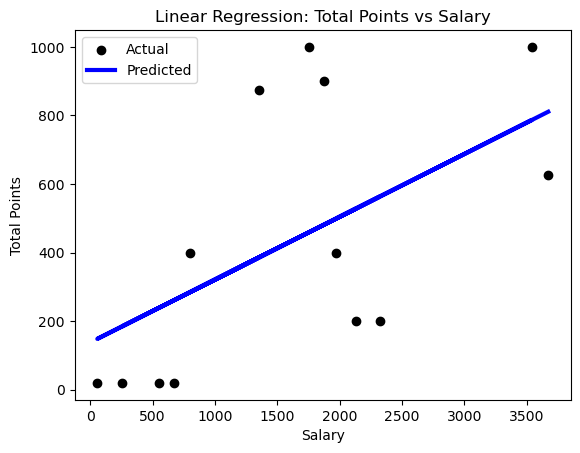

In [268]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'combined_output_with_salaries - Copy.csv'
data = pd.read_csv(file_path)

# Define the predictor and response variables
y = data['salary']  # Response variable
X = data[['Total_Points']]  # Predictor variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R^2
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Total Points')
plt.title('Linear Regression: Total Points vs Salary')
plt.legend()
plt.show()

## b2) IPL Data analysis - Last Three Years

In [271]:
player_runs_2024 = player_runs[player_runs['Season']=='2024'].sort_values(by='runs_scored',ascending=False)
player_runs_2023 = player_runs[player_runs['Season']=='2023'].sort_values(by='runs_scored',ascending=False)
player_runs_2022 = player_runs[player_runs['Season']=='2022'].sort_values(by='runs_scored',ascending=False)

player_runs_last_three_seasons = pd.concat([player_runs_2024, player_runs_2023, player_runs_2022])
player_runs_last_three_seasons.sort_values(by='runs_scored',ascending=False)

,Season,Striker,runs_scored
2423,2023,Shubman Gill,890
2144,2022,JC Buttler,863
2313,2023,F du Plessis,730
2311,2023,DP Conway,672
2433,2023,V Kohli,639
...,...,...,...
2583,2024,TA Boult,0
2527,2024,Mukesh Kumar,0
2462,2024,Anmolpreet Singh,0
2560,2024,Ravi Bishnoi,0


In [273]:
player_wickets_2024 = player_wickets[player_wickets['Season']=='2024'].sort_values(by='wicket_confirmation',ascending=False)
player_wickets_2023 = player_wickets[player_wickets['Season']=='2023'].sort_values(by='wicket_confirmation',ascending=False)
player_wickets_2022 = player_wickets[player_wickets['Season']=='2022'].sort_values(by='wicket_confirmation',ascending=False)

player_wickets_last_three_seasons = pd.concat([player_wickets_2024, player_wickets_2023, player_wickets_2022])
player_wickets_last_three_seasons.sort_values(by='wicket_confirmation',ascending=False)

,Season,Bowler,wicket_confirmation
1750,2023,MM Sharma,31
1671,2022,YS Chahal,29
1755,2023,Mohammed Shami,28
1782,2023,Rashid Khan,28
1629,2022,PWH de Silva,27
...,...,...,...
1901,2024,S Joseph,0
1874,2024,Mukesh Choudhary,0
1879,2024,Naman Dhir,0
1895,2024,Ramandeep Singh,0


In [275]:
import os
import pandas as pd

os.chdir('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance')

# Sort the DataFrame by 'wicket_confirmation' in descending order
sorted_df = player_wickets_last_three_seasons.sort_values(by='wicket_confirmation', ascending=False)
sorted_df1 = player_runs_last_three_seasons.sort_values(by='runs_scored', ascending=False)

# Save the sorted DataFrames to the current working directory
sorted_df.to_csv('sorted_player_wickets.csv', index=False)
sorted_df1.to_csv('sorted_player_runs.csv', index=False)

print("DataFrame sorted and saved to 'sorted_player_wickets.csv'.")
print("DataFrame sorted and saved to 'sorted_player_runs.csv'.")

DataFrame sorted and saved to 'sorted_player_wickets.csv'.
DataFrame sorted and saved to 'sorted_player_runs.csv'.


In [277]:
import os
import pandas as pd

# Change the working directory
os.chdir('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance')

# Load the dataset for bowlers
bowler_file_path = 'sorted_player_wickets.csv'  # Replace with your actual file path
bowler_data = pd.read_csv(bowler_file_path)

# Drop the 'Season' column for bowlers
bowler_data.drop(columns=['Season'], inplace=True)

# Aggregate the 'wicket_confirmation' by 'Bowler'
aggregated_bowler_data = bowler_data.groupby('Bowler')['wicket_confirmation'].sum().reset_index()

# Save the aggregated data to a new CSV file for bowlers directly in the specified directory
bowler_output_file_path = 'aggregated_player_wickets.csv'
aggregated_bowler_data.to_csv(bowler_output_file_path, index=False)

print(f"Aggregated bowler data saved to '{bowler_output_file_path}'.")

# Load the dataset for strikers
striker_file_path = 'sorted_player_runs.csv'  # Replace with your actual file path
striker_data = pd.read_csv(striker_file_path)

# Drop the 'Season' column for strikers
striker_data.drop(columns=['Season'], inplace=True)

# Aggregate the 'runs_scored' by 'Striker'
aggregated_striker_data = striker_data.groupby('Striker')['runs_scored'].sum().reset_index()

# Save the aggregated data to a new CSV file for strikers directly in the specified directory
striker_output_file_path = 'aggregated_player_runs.csv'
aggregated_striker_data.to_csv(striker_output_file_path, index=False)

print(f"Aggregated striker data saved to '{striker_output_file_path}'.")


Aggregated bowler data saved to 'aggregated_player_wickets.csv'.
Aggregated striker data saved to 'aggregated_player_runs.csv'.


In [279]:
import os
import pandas as pd

# Define the lcs_score function
def lcs_score(s1, s2):
    n, m = len(s1), len(s2)
    if n == 0 or m == 0:
        return 0.0

    # Calculate LCS length
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    lcs_length = dp[n][m]

    # Calculate LCS score
    average_length = (n + m) / 2.0
    score = lcs_length / average_length

    return score

# Load the CSV and Excel files
csv_path = 'aggregated_player_runs.csv'
excel_path = 'IPL SALARIES 2024.xlsx'

ball_by_ball_df = pd.read_csv(csv_path)
salaries_df = pd.read_excel(excel_path)

# Process Strikers
player_runs1 = ball_by_ball_df.groupby('Striker')['runs_scored'].sum().to_dict()
striker_names = ball_by_ball_df['Striker'].unique()
player_names = salaries_df['Player'].unique()

striker_matches = []

for striker in striker_names:
    for player in player_names:
        score = lcs_score(striker, player)
        if score > 0.80:
            actual_player_name = max(player_runs1.keys(), key=lambda k: lcs_score(player, k))
            runs_scored = player_runs1.get(actual_player_name, 0)
            striker_matches.append({'Striker': striker, 'Player': player, 'Score': score, 'Runs_Scored': runs_scored})

# Save striker matches to CSV in specified directory
striker_matches_df = pd.DataFrame(striker_matches)
striker_output_dir = r'C:\Users\Adarsh\Favorites\SCMA 2024\Assignments\A2\Last Three Years Performance'
striker_output_path = os.path.join(striker_output_dir, 'output_striker.csv')
striker_matches_df.to_csv(striker_output_path, index=False)

# Process Bowlers
csv_path1 = 'aggregated_player_wickets.csv'
ball_by_ball_df1 = pd.read_csv(csv_path1)
player_wickets1 = ball_by_ball_df1.groupby('Bowler')['wicket_confirmation'].sum().to_dict()
bowler_names = ball_by_ball_df1['Bowler'].unique()

bowler_matches = []

for bowler in bowler_names:
    for player in player_names:
        score = lcs_score(bowler, player)
        if score > 0.80:
            actual_player_name = max(player_wickets1.keys(), key=lambda k: lcs_score(player, k))
            wickets_confirmation = player_wickets1.get(actual_player_name, 0)
            bowler_matches.append({'Bowler': bowler, 'Player': player, 'Score': score, 'Wicket_Confirmation': wickets_confirmation})

# Save bowler matches to CSV in specified directory
bowler_matches_df = pd.DataFrame(bowler_matches)
bowler_output_path = os.path.join(striker_output_dir, 'output_bowler.csv')
bowler_matches_df.to_csv(bowler_output_path, index=False)

striker_output_path, bowler_output_path

('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance\\output_striker.csv',
 'C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance\\output_bowler.csv')

In [281]:
import pandas as pd

def calculate_striker_points(input_file: str, output_file: str):
    # Load the CSV file into a DataFrame
    df_striker = pd.read_csv(input_file)
    
    # Calculate Points Scored for each row
    df_striker['Points Scored'] = df_striker['Runs_Scored']
    
    # Save the modified DataFrame back to the CSV file
    df_striker.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for strikers.")

def calculate_bowler_points(input_file: str, output_file: str):
    # Load the CSV file into a DataFrame
    df_bowler = pd.read_csv(input_file)
    
    # Calculate Points Scored for each row (assuming 'wicket_confirmation' is the column name for wickets taken)
    df_bowler['Points Scored'] = df_bowler['Wicket_Confirmation'] * 25
    
    # Save the modified DataFrame back to the CSV file
    df_bowler.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for bowlers.")

# Example usage:
calculate_striker_points('output_striker.csv', 'output_striker.csv')
calculate_bowler_points('output_bowler.csv', 'output_bowler.csv')


Updated output_striker.csv with Points Scored for strikers.
Updated output_bowler.csv with Points Scored for bowlers.


In [283]:
import os
import pandas as pd

def calculate_striker_points(input_file: str, output_file: str):
    # Change the working directory
    os.chdir('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance')
    
    # Load the CSV file into a DataFrame
    df_striker = pd.read_csv(input_file)
    
    # Calculate Points Scored for each row
    df_striker['Points Scored'] = df_striker['Runs_Scored']
    
    # Save the modified DataFrame back to the CSV file in the new folder
    df_striker.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for strikers.")

def calculate_bowler_points(input_file: str, output_file: str):
    # Change the working directory
    os.chdir('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance')
    
    # Load the CSV file into a DataFrame
    df_bowler = pd.read_csv(input_file)
    
    # Calculate Points Scored for each row (assuming 'Wicket_Confirmation' is the column name for wickets taken)
    df_bowler['Points Scored'] = df_bowler['Wicket_Confirmation'] * 25
    
    # Save the modified DataFrame back to the CSV file in the new folder
    df_bowler.to_csv(output_file, index=False)
    print(f"Updated {output_file} with Points Scored for bowlers.")

# Example usage:
calculate_striker_points('output_striker.csv', 'output_striker.csv')
calculate_bowler_points('output_bowler.csv', 'output_bowler.csv')

Updated output_striker.csv with Points Scored for strikers.
Updated output_bowler.csv with Points Scored for bowlers.


In [285]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'output_striker.csv'
df = pd.read_csv(file_path)

# Rename the 'Player' column to 'Points'
df.rename(columns={'Points Scored': 'Points for Batsman'}, inplace=True)

# Save the modified DataFrame back to the CSV file
df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Batsman' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Batsman' in 'output_striker.csv'.


In [287]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'output_bowler.csv'
df = pd.read_csv(file_path)

# Rename the 'Player' column to 'Points'
df.rename(columns={'Points Scored': 'Points for Bowler'}, inplace=True)

# Save the modified DataFrame back to the CSV file
df.to_csv(file_path, index=False)

print(f"Renamed 'Points Scored' column to 'Points for Bowler' in '{file_path}'.")

Renamed 'Points Scored' column to 'Points for Bowler' in 'output_bowler.csv'.


In [289]:
import pandas as pd

# Load the CSV files
striker_df = pd.read_csv('output_striker.csv')
bowler_df = pd.read_csv('output_bowler.csv')

# Combine the two dataframes on the 'Player' column using an outer join to keep all players
combined_df = pd.merge(striker_df, bowler_df, on='Player', how='outer', suffixes=('_Batsman', '_Bowler'))

# Fill NaN values with 0 for points columns for proper addition
combined_df['Points for Batsman'].fillna(0, inplace=True)
combined_df['Points for Bowler'].fillna(0, inplace=True)

# Iterate through the combined dataframe and calculate total points
for index, row in combined_df.iterrows():
    if pd.notna(row['Points for Batsman']) and pd.notna(row['Points for Bowler']):
        total_points = row['Points for Batsman'] + row['Points for Bowler']
        if row['Points for Batsman'] > 0 and row['Points for Bowler'] > 0:
            print(f"Match found, points for {row['Player']} = {total_points}")
        else:
            print(f"No match found, total points for {row['Player']} = {total_points}")
    else:
        total_points = row['Points for Batsman'] + row['Points_Bowler']
        print(f"No match found, total points for {row['Player']} = {total_points}")

# Optionally, save the combined dataframe to a new CSV
combined_df['Total_Points'] = combined_df['Points for Batsman'] + combined_df['Points for Bowler']
combined_df.to_csv('combined_output.csv', index=False)

No match found, total points for Nehal Wadhera = 340.0
Match found, points for Rahul Tewatia = 482.0
Match found, points for Vijay Shankar = 418.0
Match found, points for Adam Zampa = 235.0
No match found, total points for Tim David = 634.0
Match found, points for Avesh Khan (T) = 947.0
Match found, points for Jason Behrendorff = 431.0
Match found, points for Amit Mishra = 219.0
Match found, points for Sam Curran = 1029.0
No match found, total points for Faf Du Plessis = 1486.0
No match found, total points for Jos Buttler = 1574.0
No match found, total points for Kane Williamson = 243.0
No match found, total points for Mayank Dagar (T) = 50.0
Match found, points for Liam Livingstone = 1102.0
Match found, points for Mohammad Shami = 1230.0
Match found, points for Prasidh Krishna = 531.0
Match found, points for R. Ashwin = 1061.0
Match found, points for K. Gowtham = 261.0
No match found, total points for Sanvir  Singh = 11.0
No match found, total points for Abhishek Porel = 235.0
Match f

In [291]:
import os
import pandas as pd

# Read the CSV file
combined_output = pd.read_csv('combined_output.csv')

# Read the Excel file
ipl_salaries = pd.read_excel('IPL SALARIES 2024.xlsx')

# Assuming the Excel sheet has columns 'Player' and 'Salary'
# If not, you need to adjust these column names accordingly.
player_salaries = ipl_salaries[['Player', 'Rs']]

# Create a dictionary for quick look-up
salary_dict = dict(zip(player_salaries['Player'], player_salaries['Rs']))

# Initialize the salary column with NaN
combined_output['salary'] = float('nan')

# Compare and update the salary
for index, row in combined_output.iterrows():
    player_name = row['Player']
    if player_name in salary_dict:
        combined_output.at[index, 'salary'] = salary_dict[player_name]
        print(f"Player {player_name} matched with a salary of Rs {salary_dict[player_name]}")

# Change the working directory
os.chdir('C:\\Users\\Adarsh\\Favorites\\SCMA 2024\\Assignments\\A2\\Last Three Years Performance')

# Save the updated DataFrame to a new CSV file directly in the specified directory
output_file_path = 'combined_output_with_salaries.csv'
combined_output.to_csv(output_file_path, index=False)

print(f"Updated DataFrame with salaries saved to '{output_file_path}'.")

Player Nehal Wadhera matched with a salary of Rs 20
Player Rahul Tewatia matched with a salary of Rs 900
Player Vijay Shankar matched with a salary of Rs 140
Player Adam Zampa matched with a salary of Rs 150
Player Tim David matched with a salary of Rs 850
Player Avesh Khan (T) matched with a salary of Rs 1000
Player Jason Behrendorff matched with a salary of Rs 50
Player Amit Mishra matched with a salary of Rs 50
Player Sam Curran matched with a salary of Rs 1850
Player Faf Du Plessis matched with a salary of Rs 700
Player Jos Buttler matched with a salary of Rs 1000
Player Kane Williamson matched with a salary of Rs 200
Player Mayank Dagar (T) matched with a salary of Rs 180
Player Liam Livingstone matched with a salary of Rs 1150
Player Mohammad Shami matched with a salary of Rs 625
Player Prasidh Krishna matched with a salary of Rs 1000
Player R. Ashwin matched with a salary of Rs 500
Player K. Gowtham matched with a salary of Rs 90
Player Sanvir  Singh matched with a salary of Rs 

In [293]:
import os
import pandas as pd

# Define the file paths
input_file = 'combined_output_with_salaries.csv'
output_file = 'combined_output_with_salaries - Copy.csv'

# Columns to keep
columns_to_keep = ['Player', 'Total_Points', 'salary']

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Keep only the specified columns
df_filtered = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file in the current working directory
df_filtered.to_csv(output_file, index=False)

print(f"Filtered data saved to '{output_file}'.")



Filtered data saved to 'combined_output_with_salaries - Copy.csv'.


Mean Squared Error: 194843.27263534846
R^2 Score: 0.41048138077879515
Adjusted R^2 Score: 0.3515295188566746
Coefficients: [0.58526794]
Intercept: 12.69992065629873


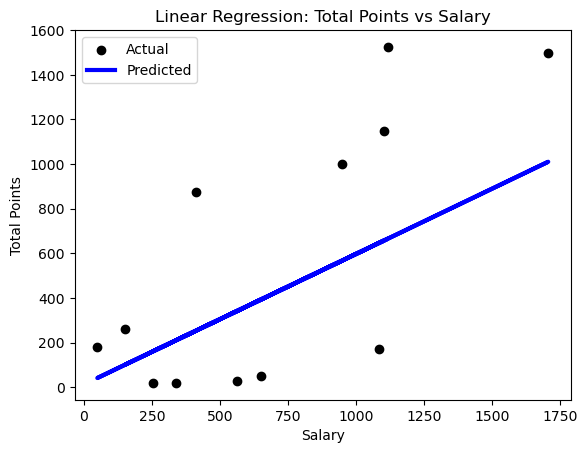

In [295]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'combined_output_with_salaries - Copy.csv'
data = pd.read_csv(file_path)

# Define the predictor and response variables
y = data['salary']  # Response variable
X = data[['Total_Points']]  # Predictor variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R^2
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Salary')
plt.ylabel('Total Points')
plt.title('Linear Regression: Total Points vs Salary')
plt.legend()
plt.show()